In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes_diseases.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# 0 --> Non-Diabetic
# 1 --> Diabetic
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [9]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [10]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

# Label Encoder

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
Le = LabelEncoder()

In [13]:
df['gender'] = Le.fit_transform(df['gender'])
df['smoking_history'] = Le.fit_transform(df['smoking_history'])

In [14]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0


In [15]:
df['gender'].value_counts()

gender
0    58552
1    41430
2       18
Name: count, dtype: int64

In [16]:
df['smoking_history'].value_counts()

smoking_history
0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: count, dtype: int64

# Splitting the Features and Target

In [17]:
x = df.drop(columns='diabetes', axis=1)
y = df['diabetes']

In [18]:
x.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80


In [19]:
y.head(2)

0    0
1    0
Name: diabetes, dtype: int64

# Feature Selection

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
model = ExtraTreesClassifier()

In [22]:
model.fit(x,y)

ExtraTreesClassifier()

In [23]:
model.feature_importances_

array([0.00592022, 0.12147604, 0.02394937, 0.01679208, 0.02704246,
       0.1303115 , 0.35113363, 0.3233747 ])

In [24]:
top = pd.Series(model.feature_importances_, index=x.columns)

In [25]:
top

gender                 0.005920
age                    0.121476
hypertension           0.023949
heart_disease          0.016792
smoking_history        0.027042
bmi                    0.130312
HbA1c_level            0.351134
blood_glucose_level    0.323375
dtype: float64

<Axes: >

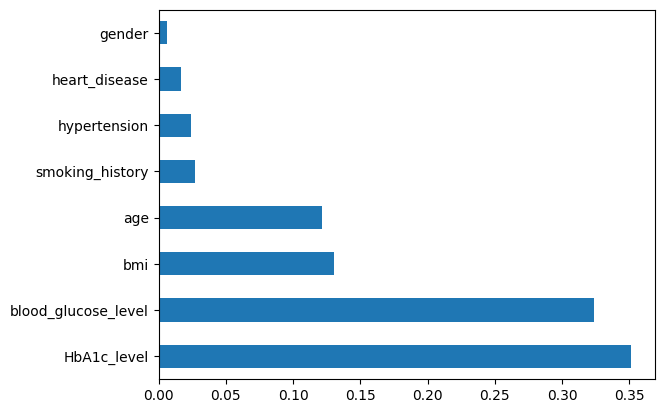

In [26]:
top.nlargest(20).plot(kind='barh')

# Splitting the Data into Training data & Test Data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

In [28]:
print(x.shape, x_train.shape, x_test.shape)

(100000, 8) (70000, 8) (30000, 8)


# Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logistic = LogisticRegression()

In [31]:
logistic.fit(x_train, y_train)

c:\Users\Abu Naiim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predict_logistic = logistic.predict(x_train)

In [33]:
accuracy_score(predict_logistic, y_train)

0.9528428571428571

# Predict

In [34]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


In [48]:
logistic.predict([[0, 80, 0,  1, 4, 25.19, 6.6, 140]])

c:\Users\Abu Naiim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [47]:
logistic.predict([[0, 54.0, 0,  0, 0, 27.32, 6.6, 80]])


c:\Users\Abu Naiim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [37]:
from joblib import dump

In [39]:
dump(logistic, './../machine_deep_models/diabetes_disease_model.joblib')

['./../machine_deep_models/diabetes_disease_model.joblib']